<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/backtests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backtest VIX

In [ ]:
!pip install vectorbt pandas yfinance

: 

In [ ]:
import vectorbt as vbt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download VIX data
vix_data = yf.download('^VIX', start='2000-01-01', end='2024-11-29')

# Define entry and exit signals
entries = vix_data['Close'] <= 14
exits = vix_data['Close'] >= 20

# Create a portfolio
portfolio = vbt.Portfolio.from_signals(
    vix_data['Close'],
    entries,
    exits,
    init_cash=20000,
    fees=0.001
)

# Simplified Equity Plot
portfolio.total_return().vbt.plot(title="Portfolio Total Return").show()
#portfolio['equity'].vbt.plot(title="Portfolio Equity Curve").show()
#portfolio.drawdowns.plot(title="Portfolio Drawdowns").show()
print(portfolio.drawdowns.records)

# Calculate and plot drawdown depth
drawdown_depth = portfolio.drawdowns.records['peak_val'] - portfolio.drawdowns.records['valley_val']

# Plot drawdown depth over time
# plt.figure(figsize=(10, 6))
# plt.plot(drawdown_depth, label="Drawdown Depth")
# plt.title("Drawdown Depth Over Time")
# plt.xlabel("Drawdown Events")
# plt.ylabel("Depth")
# plt.legend()
# plt.show()

# portfolio.drawdowns.records['valley_val'].vbt.plot(title="Drawdown Valley Values").show()



# QYLP & VYXL

In [ ]:
pip install vectorbt pandas numpy matplotlib yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 6.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


No price data available for QYLD.L. Skipping.
No price data available for VIXL.L. Skipping.
No price data available for ^GSPC. Skipping.


<ipython-input-11-8b68cdfef9c6>:108: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


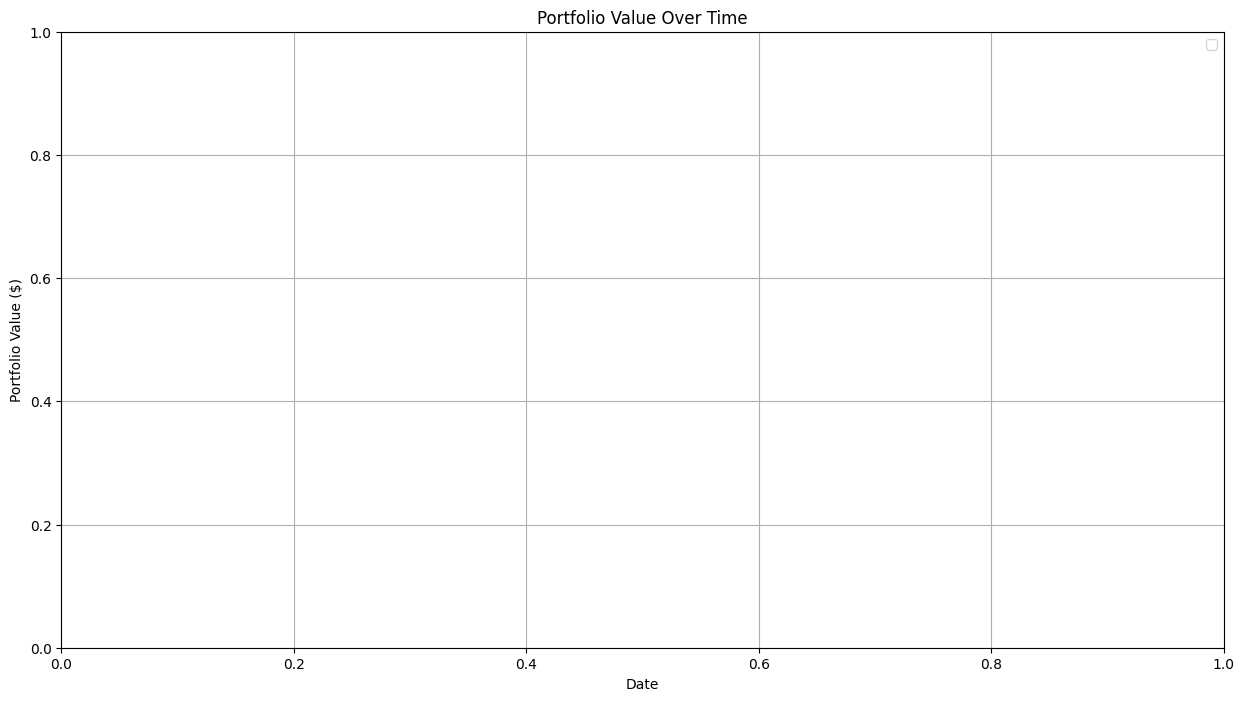

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vectorbt as vbt

def backtest_strategy(ticker, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Backtests a simple buy/sell strategy for a given ticker.

    Args:
        ticker (str): The stock ticker symbol.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.

    Returns:
        pd.DataFrame: A DataFrame containing the backtest results.
    """

    data = yf.download(ticker, start='2023-03-01', end='2025-03-01')

    if data.empty:
        print(f"No data downloaded for {ticker}. Skipping.")
        return pd.DataFrame()  # Return an empty DataFrame

    columns = data.columns.tolist()

    if 'Close' in columns:
        prices = data['Close']
    else:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    if prices.empty:
        print(f"No price data available for {ticker}. Skipping.")
        return pd.DataFrame()

    dates = prices.index

    cash = initial_cash
    initial_price = float(prices.iloc[0])  # Convert to float
    assets = initial_asset / initial_price
    portfolio_value = [cash + assets * initial_price]
    cash_values = [cash]
    asset_values = [assets * initial_price]
    positions = [assets]

    in_position = True
    buy_price = initial_price

    for i in range(1, len(prices)):
        current_price = float(prices.iloc[i])  # Convert to float
        current_portfolio_value = cash + assets * current_price
        portfolio_value.append(current_portfolio_value)
        cash_values.append(cash)
        asset_values.append(assets * current_price)
        positions.append(assets)

        if in_position:
            if (current_price / buy_price - 1) >= profit_threshold:
                cash += assets * current_price
                assets = 0
                in_position = False
                buy_price = 0
        else:
            if current_price < buy_price * (1 - profit_threshold):
                assets = cash / current_price
                cash = 0
                in_position = True
                buy_price = current_price

    results = pd.DataFrame({
        'Date': dates,
        'Portfolio Value': portfolio_value,
        'Cash': cash_values,
        'Asset Value': asset_values,
        'Positions': positions,
        'Price': prices,
    })

    return results

def run_parallel_backtests(tickers, initial_cash=5000, initial_asset=5000, profit_threshold=0.20):
    """
    Runs backtests in parallel for multiple tickers and plots the results.

    Args:
        tickers (list): A list of stock ticker symbols.
        initial_cash (float): The initial cash amount.
        initial_asset (float): The initial asset value.
        profit_threshold (float): The profit percentage threshold for selling.
    """

    results = {}
    for ticker in tickers:
        result = backtest_strategy(ticker, initial_cash, initial_asset, profit_threshold)
        if not result.empty: # added check here.
          results[ticker] = result

    plt.figure(figsize=(15, 8))
    for ticker, result in results.items():
        plt.plot(result['Date'], result['Portfolio Value'], label=ticker)

    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    for ticker, result in results.items():
        print(f"Final portfolio value for {ticker}: ${result['Portfolio Value'].iloc[-1]:.2f}")
        print(f"Final cash for {ticker}: ${result['Cash'].iloc[-1]:.2f}")
        print(f"Final position size for {ticker}: {result['Positions'].iloc[-1]:.2f}")

# Run the backtests
tickers = ['QYLD.L', 'VIXL.L', '^GSPC']
run_parallel_backtests(tickers)

# Test

In [18]:
import numpy as np

symbols = ["^VIX-USD"] #, "QYLD.L-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')

n = np.random.randint(10, 101, size=1000).tolist()
pf = vbt.Portfolio.from_random_signals(price, n=n, init_cash=100, seed=42)

mean_expectancy = pf.trades.expectancy().groupby(['randnx_n', 'symbol']).mean()
fig = mean_expectancy.unstack().vbt.scatterplot(xaxis_title='randnx_n', yaxis_title='mean_expectancy')
fig.show()

symbols = ["VIXL.L-USD", "QYLD.L-USD"]
price = vbt.YFData.download(symbols, missing_index='drop').get('Close')

windows = np.arange(2, 101)
fast_ma, slow_ma = vbt.MA.run_combs(price, window=windows, r=2, short_names=['fast', 'slow'])
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf_kwargs = dict(size=np.inf, fees=0.001, freq='1D')
pf = vbt.Portfolio.from_signals(price, entries, exits, **pf_kwargs)

fig = pf.total_return().vbt.heatmap(
    x_level='fast_window', y_level='slow_window', slider_level='symbol', symmetric=True,
    trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig.show()

pf[(10, 20, 'VIXL.L-USD')].stats()

ERROR:yfinance:$^VIX-USD: possibly delisted; no timezone found


KeyError: 'symbol'

# Zipline

In [23]:
!apt-get update
!apt-get install -y build-essential

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,796 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/

In [24]:
!pip install --force-reinstall --no-binary :all: bcolz cyordereddict

  Using cached bcolz-1.2.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached cyordereddict-1.0.0.tar.gz (138 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 79.8 MB/s eta 0:00:00
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user


In [25]:
pip install yfinance pandas matplotlib zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached logbook-1.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.6 kB)
  Using cached python-interface-1.6.1.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of zipline to determine which version is compatible with other requirements. This could take a while.
  Using cached zipline-1.4.0.tar.gz (5.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached zipline-1.3.0.tar.gz (2.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached requests_file-2.1.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached zipline-1.2.0.tar.gz (659 kB)
  Preparing metadata (setup.py) ... done
  Using cached zipline-1.1.1.tar.gz (640 kB)
  Preparing metadata (setup.py) ... done
  Using cached zipline-1.1.0.tar.gz (433 kB)
  Preparing metadata (setup.py) ..

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from zipline.api import order, record, symbol, schedule_function
from zipline.utils.events import date_rules, time_rules
from zipline import run_algorithm

def initialize(context):
    context.asset = symbol("VIX")
    context.last_buy_price = None  # Store last buy price
    context.held = False  # Track if we own VIX

    schedule_function(rebalance, date_rules.every_day(), time_rules.market_open())

def rebalance(context, data):
    current_price = data.current(context.asset, "price")

    if not context.held:  # Buy condition
        if context.last_buy_price is None or current_price <= context.last_buy_price:
            order(context.asset, 10)
            context.last_buy_price = current_price
            context.held = True
    else:  # Sell condition: 30% profit
        if current_price >= context.last_buy_price * 1.3:
            order(context.asset, -10)
            context.held = False  # Reset position

    record(VIX=current_price, last_buy=context.last_buy_price, held=int(context.held))

# Fetch VIX data from Yahoo Finance
def get_vix_data():
    vix = yf.download("^VIX", start="2015-01-01", end="2023-01-01")
    df = vix[["Adj Close"]].rename(columns={"Adj Close": "price"})
    df.index = df.index.tz_localize("UTC")  # Zipline requires UTC timestamps
    return df

# Run backtest
start = pd.Timestamp("2015-01-01", tz="utc")
end = pd.Timestamp("2023-01-01", tz="utc")

vix_data = get_vix_data()

result = run_algorithm(
    start=start, end=end, initialize=initialize,
    capital_base=10000, data_frequency="daily",
    data=vix_data
)

# Plot portfolio performance
result.portfolio_value.plot()
plt.title("VIX 30% Profit Strategy Performance")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()


ModuleNotFoundError: No module named 'zipline'